In [1]:
import cv2
import glob
from matplotlib.pyplot import imshow
%matplotlib inline

../img/raw/patient0002_OD.jpeg


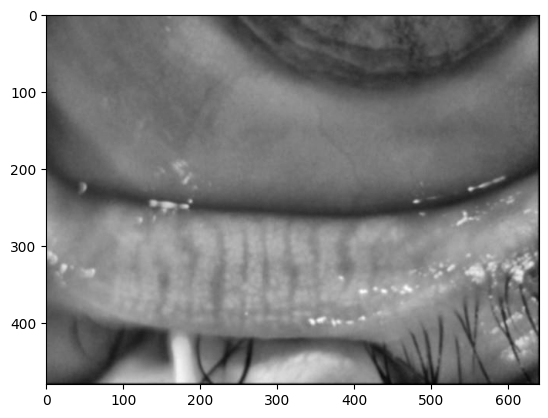

In [8]:
img_no = 4
filelist = sorted(glob.glob('../img/raw/*.jpeg'))
img = cv2.imread(filelist[img_no])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(filelist[img_no])
imshow(img, cmap = 'gray')

111.0


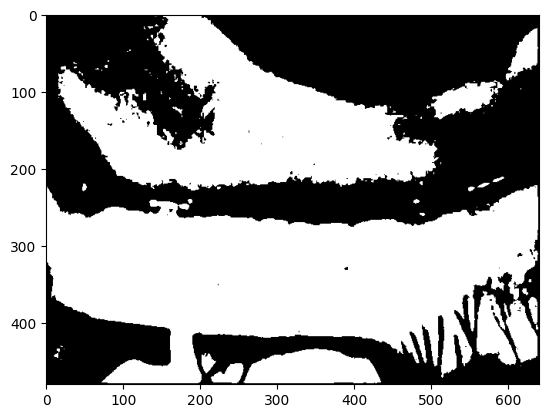

In [9]:
thr, res_thr = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
print(thr)
imshow(res_thr, cmap = 'gray')

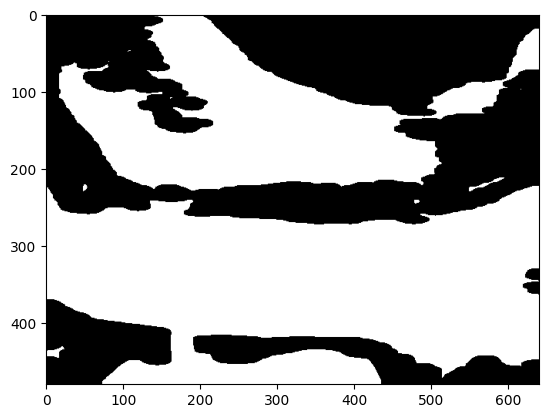

In [12]:
# Morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30,10))
res_mor = cv2.morphologyEx(res_thr, cv2.MORPH_CLOSE, kernel=kernel)
imshow(res_mor, cmap='gray')

In [ ]:
# Blob detector
detector = cv2.SimpleBlobDetector()
keypoints = detector.detect(res_mor)

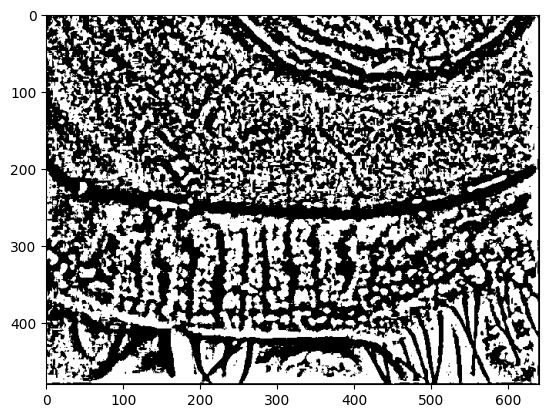

In [13]:
# Adaptive Threshold
res_athr = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize = 31, C = 0)
imshow(res_athr, cmap = 'gray')

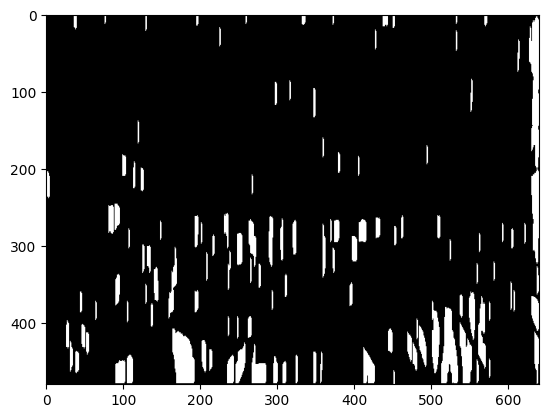

In [14]:
# Morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,25))
res_amor = cv2.morphologyEx(res_athr, cv2.MORPH_OPEN, kernel=kernel) 
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10,30))
# res_mor = cv2.morphologyEx(res_mor, cv2.MORPH_CLOSE, kernel=kernel)
imshow(res_amor, cmap='gray')

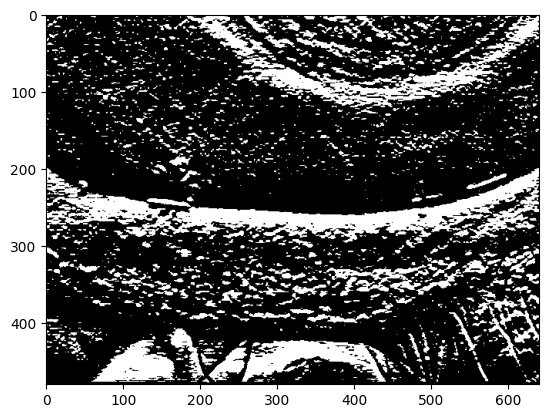

In [15]:
# Sobel Filtering
res_sbl = cv2.Sobel(img, dx=0, dy=1, ddepth=-1, ksize=3)
imshow(res_sbl>10, cmap='gray')

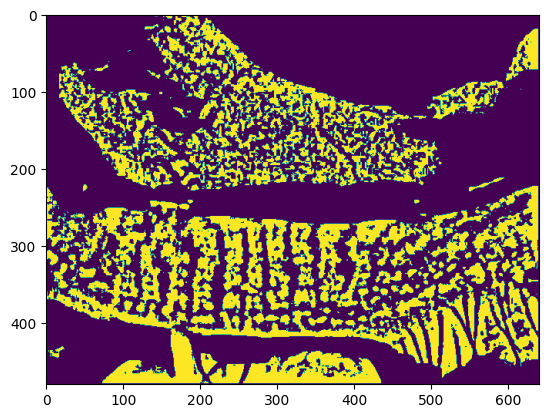

In [16]:
imshow(res_athr*res_mor)